In [3]:
import numpy as np

class ScratchSVMClassifier:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.alpha = None  # Lagrange multipliers
        self.support_vectors = None  # Support vectors will be identified during training
        self.weights = None  # Weights for the decision boundary
        self.bias = None  # Bias term for the decision boundary

    def linear_kernel(self, x_i, x_j):
        """
        Linear kernel function: k(x_i, x_j) = x_i^T * x_j
        """
        return np.dot(x_i, x_j)

    def compute_kernel_matrix(self, X):
        """
        Compute the kernel matrix for all pairs of samples
        """
        n_samples = X.shape[0]
        kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.linear_kernel(X[i], X[j])
        return kernel_matrix

    def update_lagrange_multipliers(self, X, y):
        """
        Update the Lagrange multipliers (alpha) using the kernel matrix and the formula
        """
        n_samples = X.shape[0]
        kernel_matrix = self.compute_kernel_matrix(X)
        
        # Iterate through all samples and update alpha_i based on the formula
        for i in range(n_samples):
            alpha_i_old = self.alpha[i]
            sum_lambda = 0
            for j in range(n_samples):
                sum_lambda += self.alpha[j] * y[j] * kernel_matrix[i, j]
            
            # Compute the new alpha_i (Lagrange multiplier)
            alpha_i_new = alpha_i_old + self.learning_rate * (1 - y[i] * sum_lambda)
            
            # Ensure that alpha_i >= 0
            if alpha_i_new < 0:
                alpha_i_new = 0
            
            # Update the Lagrange multiplier for the i-th sample
            self.alpha[i] = alpha_i_new

    def fit(self, X, y):
        """
        Train the SVM model using the hard-margin SVM approach with Lagrange multiplier updates
        """
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)  # Initialize the Lagrange multipliers
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = 0  # Initialize bias term
        
        # Perform iterations for updating the Lagrange multipliers
        for _ in range(self.n_iter):
            self.update_lagrange_multipliers(X, y)
            
            # After updating the Lagrange multipliers, we compute the weights (W)
            # This step can be done as an accumulation of the support vectors
            self.weights = np.sum(self.alpha[:, np.newaxis] * y[:, np.newaxis] * X, axis=0)

            # Compute the bias term (b)
            support_vector_indices = self.alpha > 0
            self.bias = np.mean(y[support_vector_indices] - np.dot(X[support_vector_indices], self.weights))

        print("Training complete.")

    def predict(self, X):
        """
        Predict class labels for the input samples using the learned model
        """
        return np.sign(np.dot(X, self.weights) + self.bias)


In [4]:
# Example training data
X_train = np.array([[2, 3], [3, 3], [3, 4], [4, 2], [4, 4], [5, 5]])
y_train = np.array([1, 1, 1, -1, -1, -1])

# Initialize and train the SVM model
svm_model = ScratchSVMClassifier(learning_rate=0.01, n_iter=1000)
svm_model.fit(X_train, y_train)

# Make predictions on new data
X_new = np.array([[3, 3], [5, 5]])
predictions = svm_model.predict(X_new)
print("Predictions:", predictions)


Training complete.
Predictions: [-1. -1.]


In [5]:
import numpy as np

class ScratchSVMClassifier:
    def __init__(self, learning_rate=0.01, n_iter=1000, threshold=1e-5):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.threshold = threshold  # Lagrange multiplier threshold for support vectors
        self.alpha = None  # Lagrange multipliers
        self.support_vectors = None  # Indices of support vectors
        self.weights = None  # Weights for the decision boundary
        self.bias = None  # Bias term for the decision boundary

    def linear_kernel(self, x_i, x_j):
        """
        Linear kernel function: k(x_i, x_j) = x_i^T * x_j
        """
        return np.dot(x_i, x_j)

    def compute_kernel_matrix(self, X):
        """
        Compute the kernel matrix for all pairs of samples
        """
        n_samples = X.shape[0]
        kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.linear_kernel(X[i], X[j])
        return kernel_matrix

    def update_lagrange_multipliers(self, X, y):
        """
        Update the Lagrange multipliers (alpha) using the kernel matrix and the formula
        """
        n_samples = X.shape[0]
        kernel_matrix = self.compute_kernel_matrix(X)
        
        # Iterate through all samples and update alpha_i based on the formula
        for i in range(n_samples):
            alpha_i_old = self.alpha[i]
            sum_lambda = 0
            for j in range(n_samples):
                sum_lambda += self.alpha[j] * y[j] * kernel_matrix[i, j]
            
            # Compute the new alpha_i (Lagrange multiplier)
            alpha_i_new = alpha_i_old + self.learning_rate * (1 - y[i] * sum_lambda)
            
            # Ensure that alpha_i >= 0
            if alpha_i_new < 0:
                alpha_i_new = 0
            
            # Update the Lagrange multiplier for the i-th sample
            self.alpha[i] = alpha_i_new

    def fit(self, X, y):
        """
        Train the SVM model using the hard-margin SVM approach with Lagrange multiplier updates
        """
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)  # Initialize the Lagrange multipliers
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = 0  # Initialize bias term
        
        # Perform iterations for updating the Lagrange multipliers
        for _ in range(self.n_iter):
            self.update_lagrange_multipliers(X, y)
            
            # After updating the Lagrange multipliers, we compute the weights (W)
            # This step can be done as an accumulation of the support vectors
            self.weights = np.sum(self.alpha[:, np.newaxis] * y[:, np.newaxis] * X, axis=0)

            # Compute the bias term (b)
            support_vector_indices = self.alpha > self.threshold  # Identify support vectors
            self.bias = np.mean(y[support_vector_indices] - np.dot(X[support_vector_indices], self.weights))

            # Store the support vectors' indices
            self.support_vectors = np.where(self.alpha > self.threshold)[0]

        print(f"Training complete. Number of support vectors: {len(self.support_vectors)}")

    def predict(self, X):
        """
        Predict class labels for the input samples using the learned model
        """
        return np.sign(np.dot(X, self.weights) + self.bias)


In [6]:
# Example training data
X_train = np.array([[2, 3], [3, 3], [3, 4], [4, 2], [4, 4], [5, 5]])
y_train = np.array([1, 1, 1, -1, -1, -1])

# Initialize and train the SVM model
svm_model = ScratchSVMClassifier(learning_rate=0.01, n_iter=1000, threshold=1e-5)
svm_model.fit(X_train, y_train)

# Make predictions on new data
X_new = np.array([[3, 3], [5, 5]])
predictions = svm_model.predict(X_new)
print("Predictions:", predictions)


Training complete. Number of support vectors: 5
Predictions: [-1. -1.]


In [7]:
import numpy as np

class ScratchSVMClassifier:
    def __init__(self, learning_rate=0.01, n_iter=1000, threshold=1e-5):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.threshold = threshold  # Lagrange multiplier threshold for support vectors
        self.alpha = None  # Lagrange multipliers
        self.support_vectors = None  # Indices of support vectors
        self.weights = None  # Weights for the decision boundary
        self.bias = None  # Bias term for the decision boundary
        self.X_support_vectors = None  # Support vector feature vectors
        self.y_support_vectors = None  # Support vector labels

    def linear_kernel(self, x_i, x_j):
        """
        Linear kernel function: k(x_i, x_j) = x_i^T * x_j
        """
        return np.dot(x_i, x_j)

    def compute_kernel_matrix(self, X):
        """
        Compute the kernel matrix for all pairs of samples
        """
        n_samples = X.shape[0]
        kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.linear_kernel(X[i], X[j])
        return kernel_matrix

    def update_lagrange_multipliers(self, X, y):
        """
        Update the Lagrange multipliers (alpha) using the kernel matrix and the formula
        """
        n_samples = X.shape[0]
        kernel_matrix = self.compute_kernel_matrix(X)
        
        # Iterate through all samples and update alpha_i based on the formula
        for i in range(n_samples):
            alpha_i_old = self.alpha[i]
            sum_lambda = 0
            for j in range(n_samples):
                sum_lambda += self.alpha[j] * y[j] * kernel_matrix[i, j]
            
            # Compute the new alpha_i (Lagrange multiplier)
            alpha_i_new = alpha_i_old + self.learning_rate * (1 - y[i] * sum_lambda)
            
            # Ensure that alpha_i >= 0
            if alpha_i_new < 0:
                alpha_i_new = 0
            
            # Update the Lagrange multiplier for the i-th sample
            self.alpha[i] = alpha_i_new

    def fit(self, X, y):
        """
        Train the SVM model using the hard-margin SVM approach with Lagrange multiplier updates
        """
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)  # Initialize the Lagrange multipliers
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = 0  # Initialize bias term
        
        # Perform iterations for updating the Lagrange multipliers
        for _ in range(self.n_iter):
            self.update_lagrange_multipliers(X, y)
            
            # After updating the Lagrange multipliers, we compute the weights (W)
            self.weights = np.sum(self.alpha[:, np.newaxis] * y[:, np.newaxis] * X, axis=0)

            # Compute the bias term (b)
            support_vector_indices = self.alpha > self.threshold  # Identify support vectors
            self.bias = np.mean(y[support_vector_indices] - np.dot(X[support_vector_indices], self.weights))

            # Store the support vectors and their corresponding labels
            self.support_vectors = np.where(self.alpha > self.threshold)[0]
            self.X_support_vectors = X[self.support_vectors]
            self.y_support_vectors = y[self.support_vectors]

        print(f"Training complete. Number of support vectors: {len(self.support_vectors)}")

    def predict(self, X):
        """
        Predict class labels for the input samples using the learned model
        """
        f_x = np.zeros(X.shape[0])
        
        # Calculate the decision function for each input sample
        for i, x in enumerate(X):
            kernel_values = np.array([self.linear_kernel(x, s) for s in self.X_support_vectors])
            f_x[i] = np.sum(self.alpha[self.support_vectors] * self.y_support_vectors * kernel_values)
        
        # Return the sign of f(x) to predict the class label
        return np.sign(f_x + self.bias)


In [8]:
# Example training data
X_train = np.array([[2, 3], [3, 3], [3, 4], [4, 2], [4, 4], [5, 5]])
y_train = np.array([1, 1, 1, -1, -1, -1])

# Initialize and train the SVM model
svm_model = ScratchSVMClassifier(learning_rate=0.01, n_iter=1000, threshold=1e-5)
svm_model.fit(X_train, y_train)

# Make predictions on new data
X_new = np.array([[3, 3], [5, 5]])
predictions = svm_model.predict(X_new)
print("Predictions:", predictions)


Training complete. Number of support vectors: 5
Predictions: [-1. -1.]


In [10]:
from sklearn.datasets import make_classification

# Generate a simple dataset (e.g., Simple Dataset 1)
# Adjusting parameters to avoid the error
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Continue with the training and testing of the SVM model


In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Assuming `y_pred_scratch` and `y_pred_sklearn` are the predicted values from your scratch and sklearn models
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch, average='macro')  # or 'micro' or 'weighted'
recall_scratch = recall_score(y_test, y_pred_scratch, average='macro')  # or 'micro' or 'weighted'

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='macro')  # or 'micro' or 'weighted'
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='macro')  # or 'micro' or 'weighted'

# Print results
print(f"Accuracy (Scratch SVM): {accuracy_scratch}")
print(f"Precision (Scratch SVM): {precision_scratch}")
print(f"Recall (Scratch SVM): {recall_scratch}")

print(f"Accuracy (Sklearn SVM): {accuracy_sklearn}")
print(f"Precision (Sklearn SVM): {precision_sklearn}")
print(f"Recall (Sklearn SVM): {recall_sklearn}")


Accuracy (Scratch SVM): 0.4666666666666667
Precision (Scratch SVM): 0.21212121212121213
Recall (Scratch SVM): 0.3333333333333333
Accuracy (Sklearn SVM): 1.0
Precision (Sklearn SVM): 1.0
Recall (Sklearn SVM): 1.0


C:\Users\Mercy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mercy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


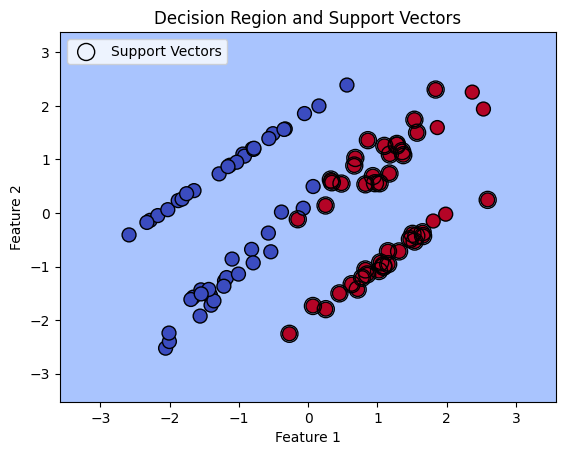

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Define the ScratchSVMClassifier class
class ScratchSVMClassifier:
    def __init__(self, learning_rate=0.01, n_iter=1000, threshold=1e-5):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.threshold = threshold
        self.alpha = None
        self.support_vectors_ = None
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        self.weights = np.zeros(n_features)
        self.bias = 0

        # SVM training process (simplified)
        for _ in range(self.n_iter):
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.weights) + self.bias) < 1:
                    # Update the weights and bias
                    self.weights += self.learning_rate * (y[i] * X[i] - 2 * (1 / self.n_iter) * self.weights)
                    self.bias += self.learning_rate * y[i]
                    self.alpha[i] += self.learning_rate * y[i]
        
        # Identify support vectors based on the threshold
        self.support_vectors_ = X[self.alpha > self.threshold]

    def predict(self, X):
        # SVM prediction (sign of the decision function)
        decision_values = np.dot(X, self.weights) + self.bias
        return np.sign(decision_values)

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                            n_redundant=0, n_classes=2, random_state=42)

# Train the model using your ScratchSVMClassifier
svm_model = ScratchSVMClassifier(learning_rate=0.01, n_iter=1000)
svm_model.fit(X, y)

# Plotting decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolor='k', s=100)
    
    support_vectors = classifier.support_vectors_  # Ensure this is populated during training
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='k', s=150, label='Support Vectors')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Region and Support Vectors')
    plt.legend(loc='upper left')

    plt.show()

# Plot decision regions and support vectors
plot_decision_regions(X, y, svm_model)


In [19]:
import numpy as np

# Define the linear kernel
def linear_kernel(xi, xj):
    return np.dot(xi, xj)

# Define the polynomial kernel
def polynomial_kernel(xi, xj, c=1, theta_0=0, d=3):
    return (c * np.dot(xi, xj) + theta_0) ** d

# Example usage
xi = np.array([1, 2])
xj = np.array([3, 4])

# Linear kernel
linear_result = linear_kernel(xi, xj)
print("Linear Kernel Result:", linear_result)

# Polynomial kernel
polynomial_result = polynomial_kernel(xi, xj, c=1, theta_0=0, d=2)
print("Polynomial Kernel Result:", polynomial_result)


Linear Kernel Result: 11
Polynomial Kernel Result: 121


In [20]:
def choose_kernel(kernel_type='linear', xi=None, xj=None, c=1, theta_0=0, d=3):
    if kernel_type == 'linear':
        return linear_kernel(xi, xj)
    elif kernel_type == 'polynomial':
        return polynomial_kernel(xi, xj, c, theta_0, d)
    else:
        raise ValueError("Unknown kernel type. Choose 'linear' or 'polynomial'.")

# Example usage
kernel_type = 'polynomial'  # You can change this to 'linear'
kernel_result = choose_kernel(kernel_type, xi, xj, c=1, theta_0=0, d=2)
print(f"Result using {kernel_type} kernel:", kernel_result)


Result using polynomial kernel: 121
